In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [80]:
df = pd.read_json("./datasets/supervised_dataset_3.json")

In [81]:
df

,name,h_start,h_60d,h_60d_change,h_120d,h_120d_change,h_max,flag
0,0x0.ai: AI Smart Contract,0.000071,0.006704,93.420219,0.058722,826.062446,0.487685,1
1,0xBlack,0.000612,0.000322,-0.474006,0.000000,0.000000,0.000810,0
2,0xFair,0.001564,0.000547,-0.650338,0.000000,0.000000,0.008289,0
3,1ex,0.061429,0.000000,0.000000,0.000000,0.000000,0.083596,0
4,1inch,2.294162,3.678071,0.603231,3.953284,0.723193,7.489723,1
...,...,...,...,...,...,...,...,...
2056,xWIN Finance,0.803825,0.699272,-0.130070,0.563325,-0.299195,0.803825,0
2057,yearn.finance,369.146991,34884.580440,93.500514,17625.311288,46.746052,82924.082581,1
2058,zkSwap Finance,0.062160,0.051075,-0.178338,0.000000,0.000000,0.062160,0
2059,zkSync id,0.054514,0.039591,-0.273744,0.000000,0.000000,0.058305,0


<Axes: >

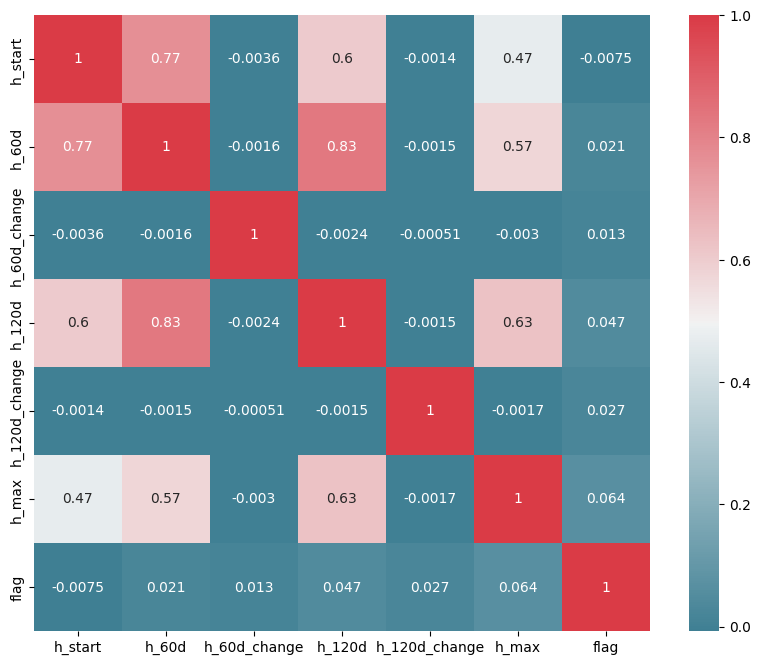

In [82]:
f, ax = plt.subplots(figsize=(10, 8))
df_num = df.select_dtypes(include=[np.number])
corr = df_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)

In [83]:
X = df.drop(['flag', 'name'], axis=1)
y = df['flag']

In [84]:
X

,h_start,h_60d,h_60d_change,h_120d,h_120d_change,h_max
0,0.000071,0.006704,93.420219,0.058722,826.062446,0.487685
1,0.000612,0.000322,-0.474006,0.000000,0.000000,0.000810
2,0.001564,0.000547,-0.650338,0.000000,0.000000,0.008289
3,0.061429,0.000000,0.000000,0.000000,0.000000,0.083596
4,2.294162,3.678071,0.603231,3.953284,0.723193,7.489723
...,...,...,...,...,...,...
2056,0.803825,0.699272,-0.130070,0.563325,-0.299195,0.803825
2057,369.146991,34884.580440,93.500514,17625.311288,46.746052,82924.082581
2058,0.062160,0.051075,-0.178338,0.000000,0.000000,0.062160
2059,0.054514,0.039591,-0.273744,0.000000,0.000000,0.058305


In [85]:
cols = X.columns

In [86]:
# scaler = MinMaxScaler((-1,1))
# X = scaler.fit_transform(X)
X

,h_start,h_60d,h_60d_change,h_120d,h_120d_change,h_max
0,0.000071,0.006704,93.420219,0.058722,826.062446,0.487685
1,0.000612,0.000322,-0.474006,0.000000,0.000000,0.000810
2,0.001564,0.000547,-0.650338,0.000000,0.000000,0.008289
3,0.061429,0.000000,0.000000,0.000000,0.000000,0.083596
4,2.294162,3.678071,0.603231,3.953284,0.723193,7.489723
...,...,...,...,...,...,...
2056,0.803825,0.699272,-0.130070,0.563325,-0.299195,0.803825
2057,369.146991,34884.580440,93.500514,17625.311288,46.746052,82924.082581
2058,0.062160,0.051075,-0.178338,0.000000,0.000000,0.062160
2059,0.054514,0.039591,-0.273744,0.000000,0.000000,0.058305


In [87]:
X = pd.DataFrame(X, columns = cols)
X

,h_start,h_60d,h_60d_change,h_120d,h_120d_change,h_max
0,0.000071,0.006704,93.420219,0.058722,826.062446,0.487685
1,0.000612,0.000322,-0.474006,0.000000,0.000000,0.000810
2,0.001564,0.000547,-0.650338,0.000000,0.000000,0.008289
3,0.061429,0.000000,0.000000,0.000000,0.000000,0.083596
4,2.294162,3.678071,0.603231,3.953284,0.723193,7.489723
...,...,...,...,...,...,...
2056,0.803825,0.699272,-0.130070,0.563325,-0.299195,0.803825
2057,369.146991,34884.580440,93.500514,17625.311288,46.746052,82924.082581
2058,0.062160,0.051075,-0.178338,0.000000,0.000000,0.062160
2059,0.054514,0.039591,-0.273744,0.000000,0.000000,0.058305


In [88]:
y

0       1
1       0
2       0
3       0
4       1
       ..
2056    0
2057    1
2058    0
2059    0
2060    0
Name: flag, Length: 2061, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [90]:
#X_test = scaler.fit_transform(X_test)

In [91]:
def build_classifier():
    model = Sequential([
        Input(shape=(X_train.shape[1], )),
        Dense(32, activation='tanh'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = build_classifier()

In [92]:
X_train

,h_start,h_60d,h_60d_change,h_120d,h_120d_change,h_max
1533,0.696629,0.310335,-0.554519,0.532810,-0.235159,0.722251
54,0.040076,0.009054,-0.774081,0.007351,-0.816568,0.078743
1752,0.009580,0.007286,-0.239481,0.006849,-0.285107,0.592515
1199,0.001823,0.002033,0.115393,0.000000,0.000000,0.004297
1399,0.286670,8.329660,28.056574,4.120782,13.374634,56.789731
...,...,...,...,...,...,...
1033,0.006461,0.000000,0.000000,0.000000,0.000000,0.531513
1731,0.002711,0.001682,-0.379550,0.012026,3.436094,0.078953
763,0.283181,0.192600,-0.319870,0.322946,0.140424,1.084470
835,0.000461,0.023295,49.530082,0.002119,3.596795,0.031616


In [93]:
checkpoint = ModelCheckpoint('best_model2.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(x = X_train, y = y_train, epochs = 500, batch_size = 16, validation_data=(X_test,y_test), callbacks = [checkpoint])

Epoch 1/500


 58/103 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.6122 - loss: 0.6324
Epoch 1: val_loss improved from inf to 0.47011, saving model to best_model2.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6681 - loss: 0.6108 - val_accuracy: 0.8257 - val_loss: 0.4701
Epoch 2/500
 61/103 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8167 - loss: 0.4398
Epoch 2: val_loss improved from 0.47011 to 0.38898, saving model to best_model2.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8238 - loss: 0.4285 - val_accuracy: 0.8402 - val_loss: 0.3890
Epoch 3/500
 61/103 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8617 - loss: 0.3416
Epoch 3: val_loss improved from 0.38898 to 0.36164, saving model to best_model2.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8579 - loss: 0.3459 - val_accuracy: 0.8450 - val_loss: 0.3616
Epoch 4/500
 59/103 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8515 - loss: 0.3423
Epoch 4: val_loss improved from 0.36164 to 0.34903,

In [100]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

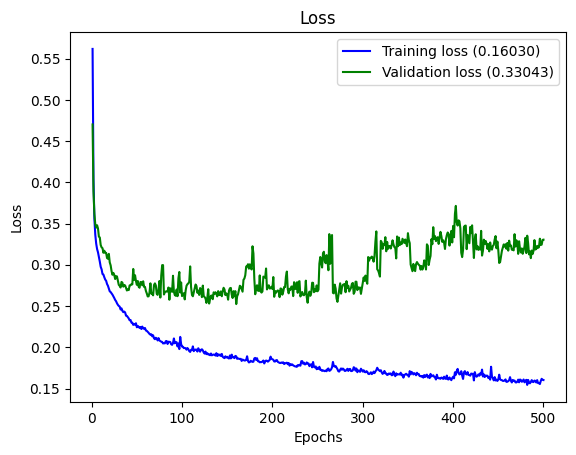

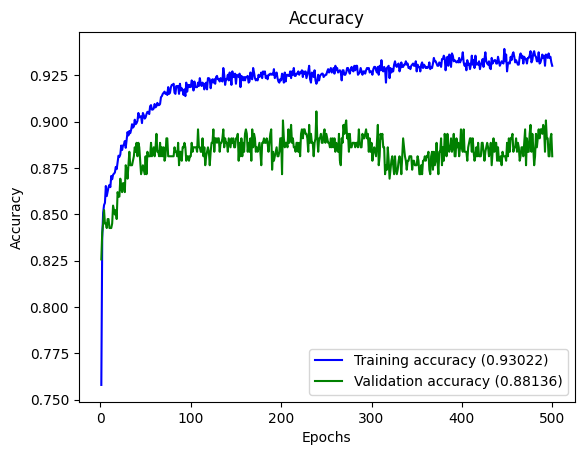

In [101]:
plot_history(history)

In [96]:
from keras.models import load_model
# Cargar el modelo
model = load_model('best_model2.keras')

In [97]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
cm

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[231,  19],
       [ 25, 138]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

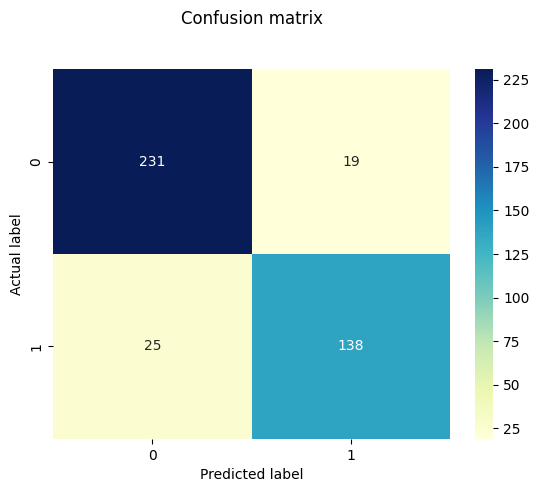

In [98]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       250
           1       0.88      0.85      0.86       163

    accuracy                           0.89       413
   macro avg       0.89      0.89      0.89       413
weighted avg       0.89      0.89      0.89       413

